In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("auto-mpg.csv")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


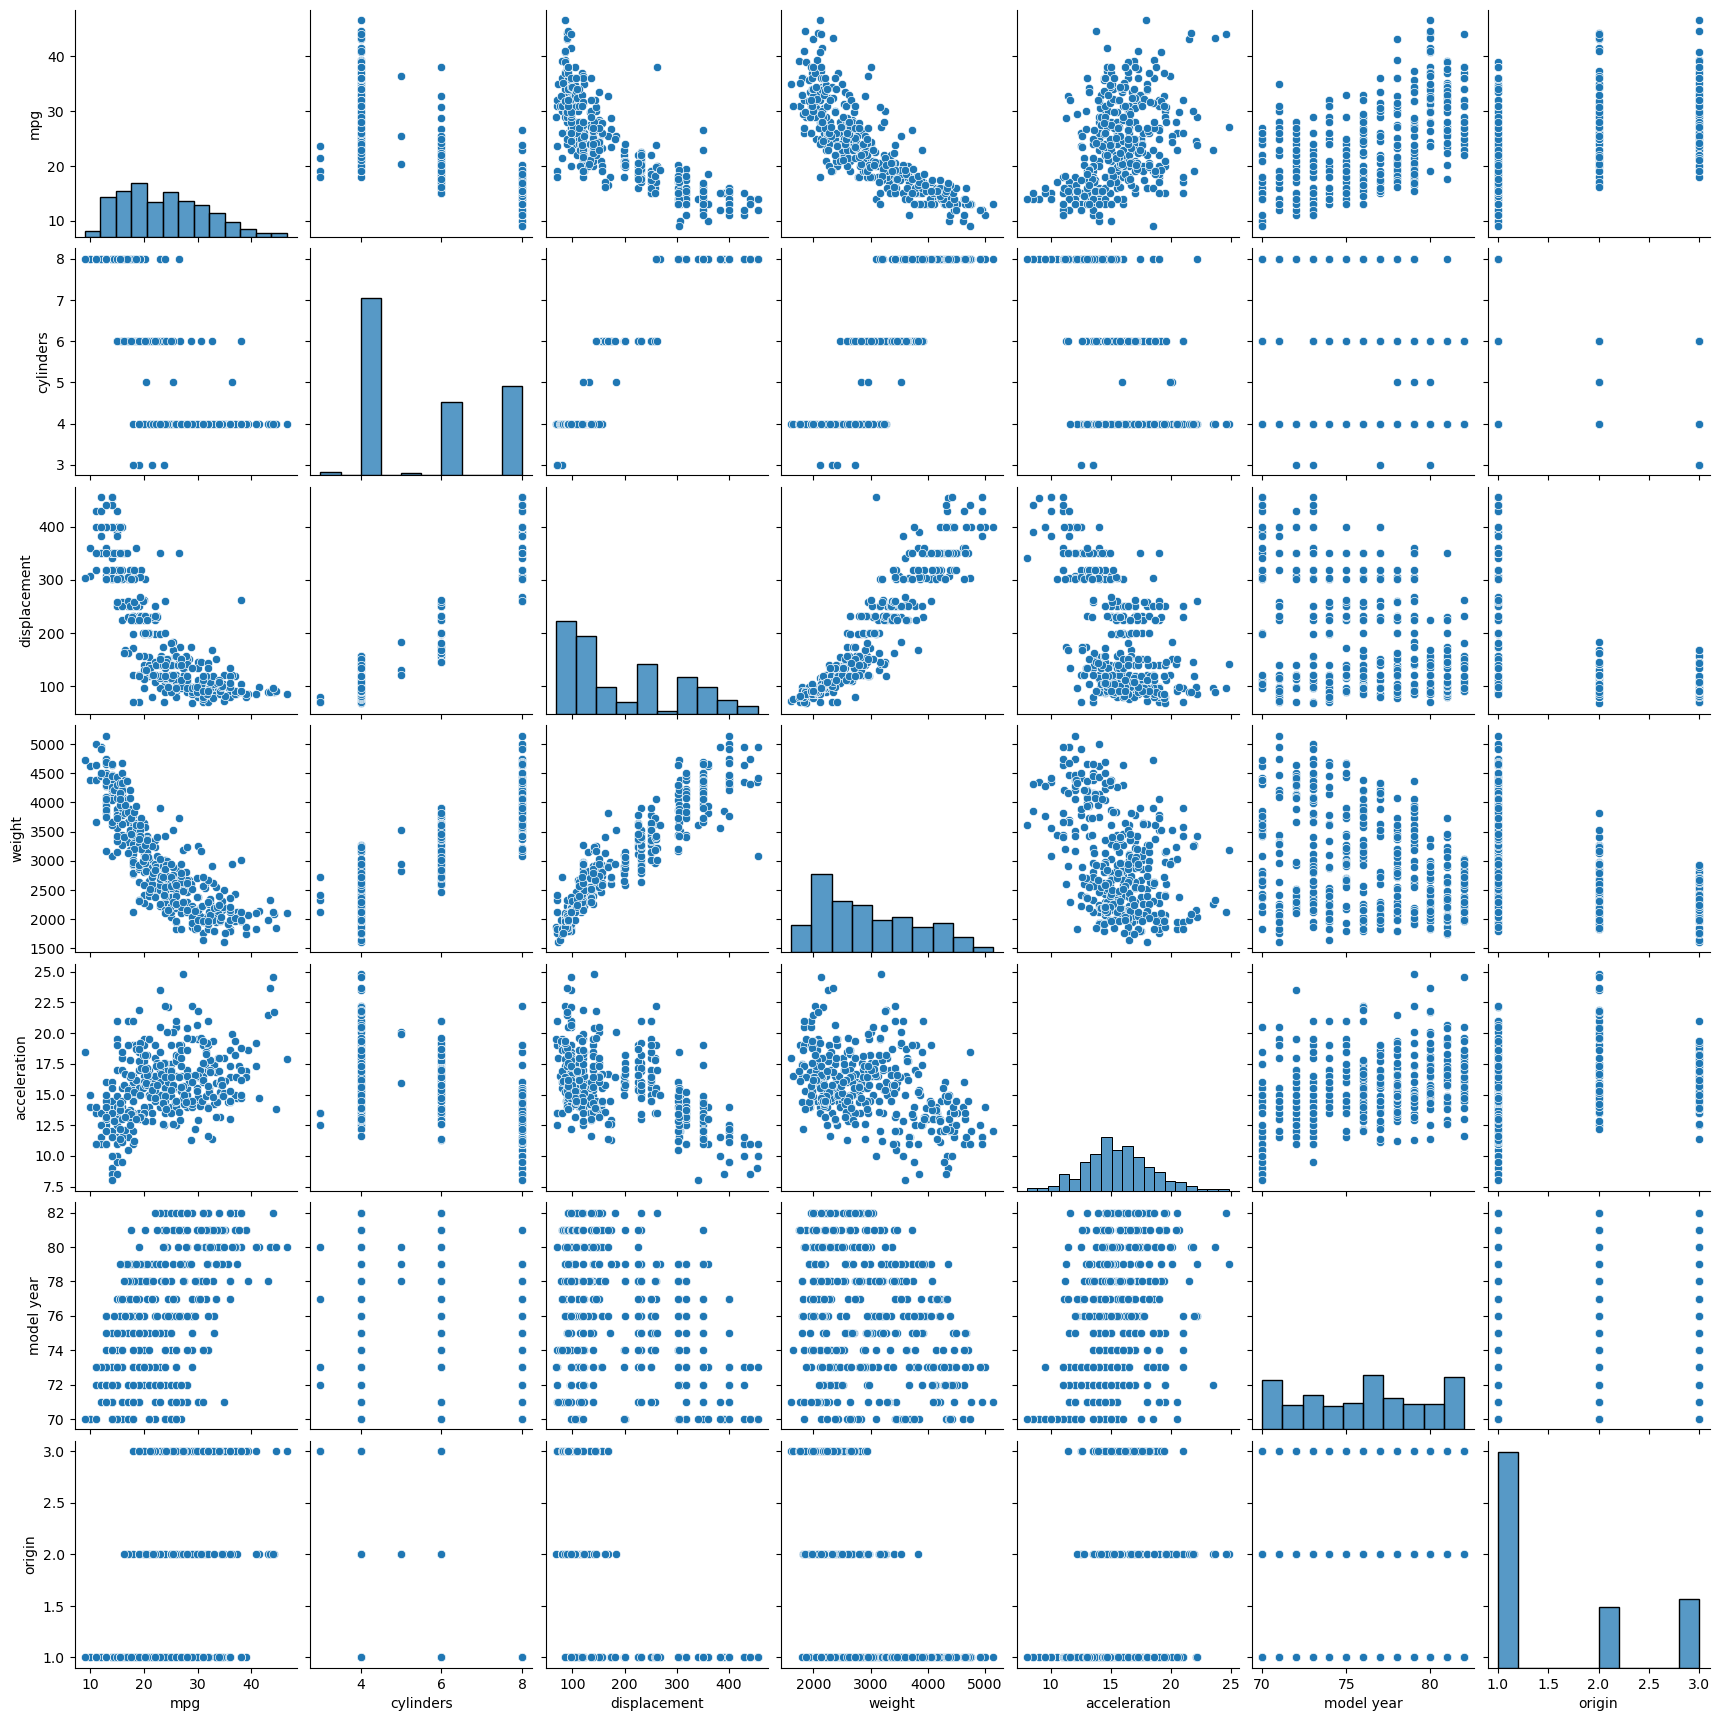

In [3]:
sns.pairplot(df)

<Axes: xlabel='weight', ylabel='mpg'>

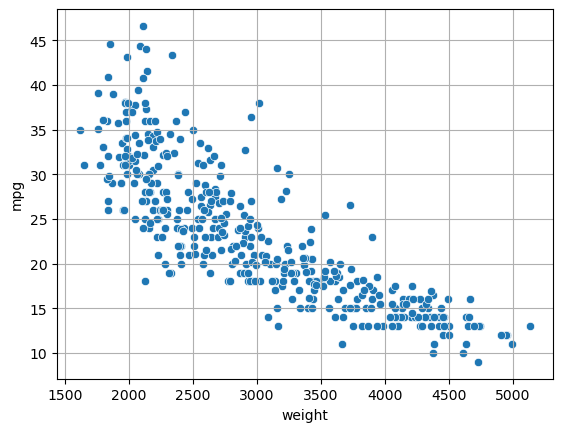

In [4]:
sns.scatterplot(data=df, x="weight", y="mpg")
plt.grid(True)
plt.gca()

In [5]:
gpm = (1.0 / df.mpg)
lp100 = gpm * 3.78541 / 1.60934 * 100
lp100 = lp100.rename("lp100")

In [6]:
weight_kg = df.weight * 0.453592
weight_kg = weight_kg.rename("weight_kg")

In [7]:
dfr = pd.DataFrame({lp100.name: lp100, weight_kg.name: weight_kg})
dfr

,lp100,weight_kg
0,13.067503,1589.386368
1,15.681004,1675.115256
2,13.067503,1558.542112
3,14.700941,1557.181336
4,13.836180,1564.438808
...,...,...
393,8.711669,1265.521680
394,5.345797,966.150960
395,7.350471,1040.993640
396,8.400538,1190.679000


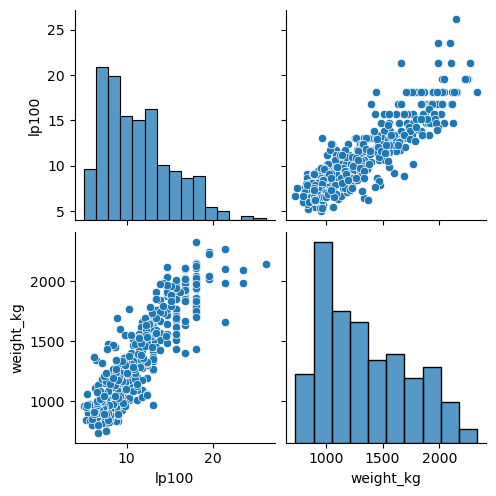

In [8]:
sns.pairplot(dfr)

In [9]:
x, _, _, _ = np.linalg.lstsq(
    a=np.stack([dfr.weight_kg, np.ones_like(dfr.weight_kg)], axis=1),
    b=dfr.lp100,
)
x

array([ 0.00899249, -0.90305387])

In [10]:
def lp100_pred(weight_kg):
    return x[0] * weight_kg + x[1]

<Axes: xlabel='weight_kg', ylabel='lp100'>

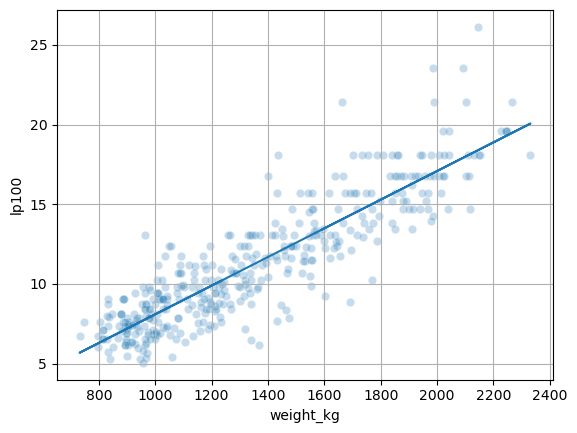

In [11]:
sns.scatterplot(x=dfr.weight_kg, y=dfr.lp100, color="C0", alpha=0.25)
plt.plot(dfr.weight_kg, lp100_pred(dfr.weight_kg), color="C0")
plt.grid(True)
plt.savefig("images/prediction.png")
plt.gca()

In [12]:
pred_error = lp100_pred(dfr.weight_kg) - dfr.lp100
pred_error = pred_error.rename("pred_error")
pred_error

0      0.321988
1     -1.520596
2      0.044621
3     -1.601053
4     -0.671029
         ...   
393    1.765472
394    2.439255
395    1.107603
396    1.403580
397    2.604033
Name: pred_error, Length: 398, dtype: float64

In [13]:
pred_error.describe()

count    3.980000e+02
mean    -2.142340e-15
std      1.815156e+00
min     -7.736598e+00
25%     -1.026614e+00
50%      4.693113e-02
75%      1.196074e+00
max      5.448262e+00
Name: pred_error, dtype: float64

<Axes: xlabel='pred_error', ylabel='Count'>

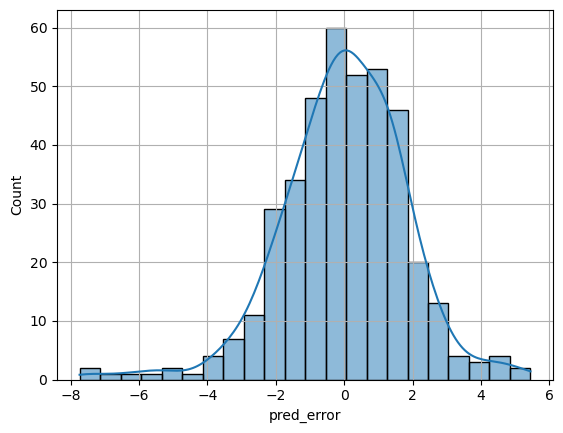

In [14]:
sns.histplot(data=pred_error, kde=True)
plt.grid(True)
plt.savefig("images/error.png")
plt.gca()